In [16]:
import seaborn as sns

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [2]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [3]:
import pandas as pd
import numpy as np

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston['MEDV'] = boston_dataset.target
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, 
random_state=42)

In [10]:
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
print(reg.coef_)

[-0.67873898  4.82035621]


In [12]:
y_pred = reg.predict(x_test)
print(y_pred)

[25.74505916 31.13347279 17.52883188 26.44227535 19.58541492 23.09596513
 17.01975517 14.3159995  22.24408223 20.27941136 17.47639133 18.28843618
 -2.36312381 22.61827496 20.4996517  26.68544392 17.36009694  3.69380472
 36.89790451 18.4618195  26.55958698 27.31886979 13.15264811 26.17065665
 19.24831147 14.8012021  23.09170175 20.68560431 17.96095488 19.31237833
 17.84180325 27.04214245 27.08246715 19.88385388 15.41933731 17.75557917
 32.8523954  22.59248268 20.23378068 25.93888672 12.58663197 28.85716926
 37.72542766 19.03383346 25.90598948 16.87892513 15.97944452 27.32455396
 19.62393282 29.26717607 20.91210827 31.42628427 17.85408818 28.43436158
 34.81669984 24.19848407 19.67096965 31.76571727 25.22124093 15.44202903
 27.10068247 32.63148179 29.98436944 19.31885888 28.94030062 11.04135456
 20.52596775 26.77021299 29.81155093 16.85707475 19.23987853 28.23741881
 13.02461894 25.78651245 23.57979189  6.476231   22.3117392  36.22171593
 18.19486773 10.78148919 23.35513475 10.11068577 22

In [13]:
y_pred[2]
y_test[0]

24.0

In [14]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

28.97075021100663


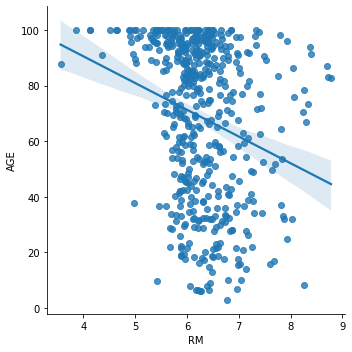

In [21]:
sns.lmplot(x= 'RM', y='AGE', data = boston)